In [22]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from utils_package.util_funcs import load_json

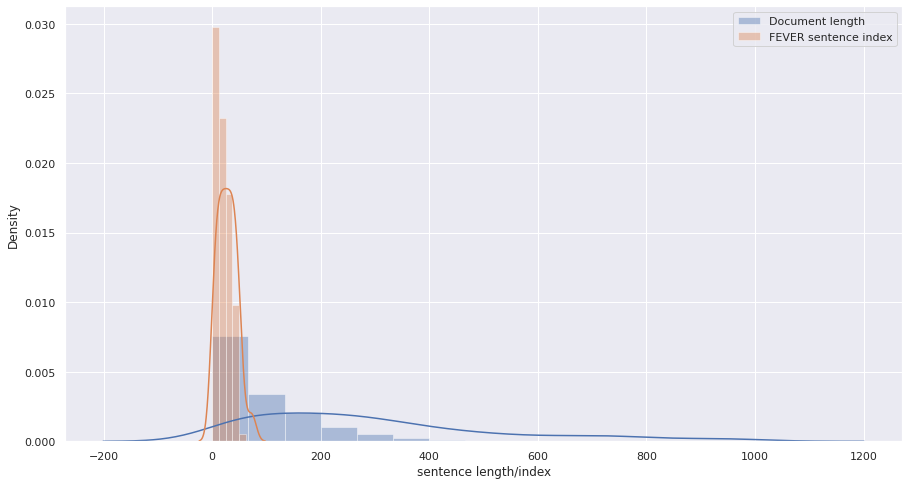

In [52]:
doc_length_counts = load_json("data/fever/stats/doc_length_counts.json")
train_sent_idx_counts = load_json("data/fever/stats/train_sent_idx_counts.json")

doc_length_counts_1000 = {k: v for (k, v) in doc_length_counts.items() if int(k) <= 1000}
train_sent_idx_counts_1000 = {k: v for (k, v) in train_sent_idx_counts.items() if int(k) <= 1000}

doc_len_int_keys = [int(elem) for elem in doc_length_counts_1000.keys()]
train_sent_idx_int_keys = [int(elem) for elem in train_sent_idx_counts_1000.keys()]

sns.set(rc={"figure.figsize": (15,8)})
f, ax = plt.subplots(1, 1)

sns.distplot(
  doc_len_int_keys, 
  hist_kws={"weights": np.log(list(doc_length_counts_1000.values()))}, 
  label="Document length",
  axlabel="sentence length/index"  
)
sns.distplot(
  train_sent_idx_int_keys, 
  hist_kws={"weights": np.log(list(train_sent_idx_counts_1000.values()))}, 
  label="FEVER sentence index"
)

ax.legend()


<AxesSubplot:xlabel='evidence length', ylabel='Density'>

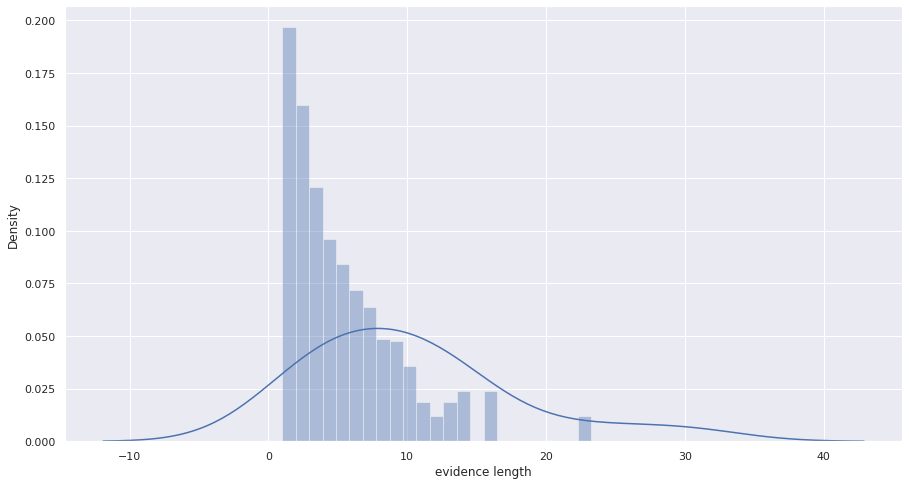

In [62]:
evidence_len = load_json("data/fever/stats/evidence_length_distribution.json")

evidence_len_int_keys = [int(elem) for elem in evidence_len.keys()]
y = list(evidence_len.values())
y_log = np.log(y)

sns.set(rc={"figure.figsize": (15,8)})
f, ax = plt.subplots(1, 1)

sns.distplot(
  evidence_len_int_keys, 
  hist_kws={"weights": y_log}, 
  bins=30,
  axlabel="evidence length"  
)

### PubHealth dataset sources in relation of FEVER evidence sentences

<AxesSubplot:xlabel='number of sources', ylabel='Density'>

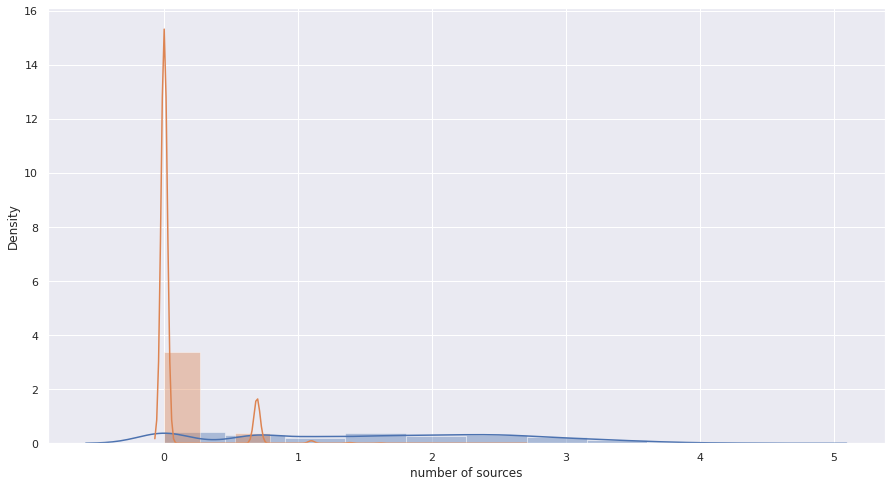

In [77]:
pubhealth_source_counts = load_json("data/pubhealth/stats/source_counts.json")
fever_source_counts = load_json("data/fever/stats/nr_of_sources_dist.json")
log_pubhealth_source_counts = np.log(pubhealth_source_counts)
log_fever_source_counts = np.log(fever_source_counts)

sns.set(rc={"figure.figsize": (15,8)})
f, ax = plt.subplots(1, 1)

sns.distplot(
  log_pubhealth_source_counts, 
  bins=10,
  axlabel="number of sources"  
)

sns.distplot(
  log_fever_source_counts, 
  bins=10,
  axlabel="number of sources"  
)


### Precision-recall curve for Claim Buster predictions on numerical riksdagen dataset

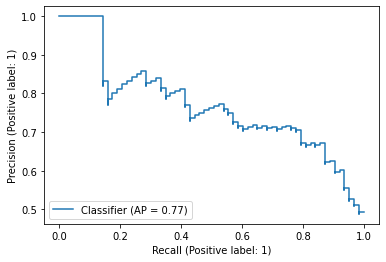

In [2]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

data_file = "data/riksdagen/partiledardebatt-numerical-22-01-12-labeled-with-predictions.csv"
df = pd.read_csv(data_file)

gold_labels = df["label"].to_numpy()
prediction_scores = df["prediction"].to_numpy()

precision, recall, thresholds = precision_recall_curve(gold_labels, prediction_scores)

display = PrecisionRecallDisplay.from_predictions(gold_labels, prediction_scores)


### Det curve for Claim Buster predictions on numerical riksdagen dataset

In [ ]:
import pandas as pd
from sklearn.metrics import det_curve, PrecisionRecallDisplay

data_file = "data/riksdagen/partiledardebatt-numerical-22-01-12-labeled-with-predictions.csv"
df = pd.read_csv(data_file)

gold_labels = df["label"].to_numpy()
prediction_scores = df["prediction"].to_numpy()

precision, recall, thresholds = precision_recall_curve(gold_labels, prediction_scores)

display = PrecisionRecallDisplay.from_predictions(gold_labels, prediction_scores)
